# Translation Pipeline

In [14]:
import deepl
api_key = "a6e1752e-a53b-42ad-809f-c4b67512cdbc:fx"
translator = deepl.Translator(api_key)

input_path = "C:\\Users\\shad4\\Downloads\\Finnish Printing\\anew_emotion.xlsx"
output_path = "files\\anew_emotion_slovenian.csv"

try:
    with open(input_path, "rb") as in_file, open(output_path, "wb") as out_file:
        translator.translate_document(
            in_file,
            out_file,
            target_lang="SL"
        )
    print("Finished with translation.")
except deepl.DocumentTranslationException as error:
    # If an error occurs during document translation after the document was
    # already uploaded, a DocumentTranslationException is raised. The
    # document_handle property contains the document handle that may be used to
    # later retrieve the document from the server, or contact DeepL support.
    doc_id = error.document_handle.id
    doc_key = error.document_handle.key
    print(f"Error after uploading ${error}, id: ${doc_id} key: ${doc_key}")
except deepl.DeepLException as error:
    # Errors during upload raise a DeepLException
    print(error)

Finished with translation.


In [52]:
import pandas as pd
argument_metadata = pd.read_csv("files\\argument_metadata.csv")
gb_argument_metadata = argument_metadata[argument_metadata['name_id'].str.contains("GB-")]
name_group = gb_argument_metadata.groupby("name_id")["label_text"].value_counts().unstack(fill_value=0).reset_index()


display(name_group)
display(argument_metadata)

speech_metadata = pd.read_parquet("D:\\ParlaMint Data\\Raw Data\\ParlaMint-GB-RawSpeechesParquet.gzip")
speech_metadata


label_text,name_id,Leverage,Others,Threat,Value
0,GB-AaronBell,1,0,2,0
1,GB-AbenaOppongAsare,0,0,1,1
2,GB-AbimbolaAfolami,0,0,1,0
3,GB-AdamAfriyie,0,0,1,2
4,GB-AdrianBailey,0,0,0,1
...,...,...,...,...,...
1394,GB-YasminQureshi,1,0,4,0
1395,GB-YvetteCooper,7,1,52,12
1396,GB-ZacGoldsmith,1,3,12,6
1397,GB-ZahidaManzoor,2,0,0,0


,name_id,Name,Date,ID,text,codes,probs,Country,name,gender,term_start,roles,parties,party_orientation,legislative_branch,label_text,party_orientation_new
0,GB-AaronBell,AaronBell,2021-02-24,ParlaMint-GB_2021-02-24-commons.u130,agree that this recent practice of trying to e...,LABEL_1,93.42,GB,"Aaron Stuart, Bell",M,2019-12-12,member,['Conservative'],['Centre-right'],['Lower'],Threat,Centre-right
1,GB-AaronBell,AaronBell,2020-07-20,ParlaMint-GB_2020-07-20-commons.u293,"scrutiny, we will not get the best deal from t...",LABEL_2,47.29,GB,"Aaron Stuart, Bell",M,2019-12-12,member,['Conservative'],['Centre-right'],['Lower'],Leverage,Centre-right
2,GB-AaronBell,AaronBell,2020-11-10,ParlaMint-GB_2020-11-10-commons.u402,"seen in the states, it also tends to undermine...",LABEL_1,58.28,GB,"Aaron Stuart, Bell",M,2019-12-12,member,['Conservative'],['Centre-right'],['Lower'],Threat,Centre-right
3,GB-AbenaOppongAsare,AbenaOppongAsare,2021-09-07,ParlaMint-GB_2021-09-07-commons.u433,and secure. putting these additional barriers ...,LABEL_1,99.68,GB,"Abena, Oppong-Asare",F,2019-12-12,member,['Labour'],['Centre-left'],['Lower'],Threat,Centre-left
4,GB-AbenaOppongAsare,AbenaOppongAsare,2021-09-07,ParlaMint-GB_2021-09-07-commons.u433,on non-party campaigning it is important to be...,LABEL_0,50.25,GB,"Abena, Oppong-Asare",F,2019-12-12,member,['Labour'],['Centre-left'],['Lower'],Value,Centre-left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26136,UA-ЯрославПетровичМендусь.1960,ЯрославПетровичМендусь.1960,2006-11-14,ParlaMint-UA_2006-11-14-m0.u12,"україна”, бо гарант дотримання конституції за ...",LABEL_1,93.75,UA,"Ярослав Jaroslav, Петрович Мендусь Petrovyč Me...",M,2006-05-25,"['member', 'representative']",['Соціалістична партія України'],['Left'],['Unicameralism'],Threat,Left
26137,UA-ЯрославПетровичМендусь.1960,ЯрославПетровичМендусь.1960,2006-10-18,ParlaMint-UA_2006-10-18-m0.u14,", у тому числі на місцевому рівні, відкриє шля...",LABEL_1,62.53,UA,"Ярослав Jaroslav, Петрович Мендусь Petrovyč Me...",M,2006-05-25,"['member', 'representative']",['Соціалістична партія України'],['Left'],['Unicameralism'],Threat,Left
26138,UA-ЯрославПетровичМендусь.1960,ЯрославПетровичМендусь.1960,2007-04-03,ParlaMint-UA_2007-04-03-m0.u20,", лідери опозиції намагаються приховати власни...",LABEL_1,90.37,UA,"Ярослав Jaroslav, Петрович Мендусь Petrovyč Me...",M,2006-05-25,"['member', 'representative']",['Соціалістична партія України'],['Left'],['Unicameralism'],Threat,Left
26139,UA-ЯрославРомановичЮрчишин.1980,ЯрославРомановичЮрчишин.1980,2022-12-01,ParlaMint-UA_2022-12-01-m0.u12,"-терористом, виключити це процедуру як обов’яз...",LABEL_1,90.16,UA,"Ярослав Jaroslav, Романович Юрчишин Romanovyč ...",M,2019-08-29,"['member', 'representative']",['Політична партія «Голос»'],['Centre-right'],['Unicameralism'],Threat,Centre-right


,speech_id,speech,person_id
0,ParlaMint-GB_2015-01-05-commons.u1,1. What progress her Department has made on im...,GB-JenniferWillott
1,ParlaMint-GB_2015-01-05-commons.u2,The Government are on track to deliver their c...,GB-TheresaMay
2,ParlaMint-GB_2015-01-05-commons.u3,"It is clear that exit checks, which were scrap...",GB-JenniferWillott
3,ParlaMint-GB_2015-01-05-commons.u4,"As I indicated in my original answer, we are o...",GB-TheresaMay
4,ParlaMint-GB_2015-01-05-commons.u5,19. Given the situation at our border in Calai...,GB-AlexanderCunningham
...,...,...,...
670907,ParlaMint-GB_2022-07-21-lords.u209,I will have to check that point for the noble ...,GB-JoannaPenn
670908,ParlaMint-GB_2022-07-21-lords.u210,"My Lords, the Minister has referred a number o...",GB-PremSikka
670909,ParlaMint-GB_2022-07-21-lords.u211,The noble Lord is right that different aspects...,GB-JoannaPenn
670910,ParlaMint-GB_2022-07-21-lords.u212,I thank noble Lords for a very interesting deb...,GB-PremSikka


In [98]:
speech_length = speech_metadata['speech'].apply(lambda x: len(str(x)))
total_speech_length = pd.DataFrame(speech_metadata.groupby("person_id")["speech_length"].sum()).reset_index()
total_speech_length = total_speech_length.rename(columns={"person_id":"name_id"})
merged_gb_data = pd.merge(total_speech_length, name_group, on="name_id")
adj_value = 10000
merged_gb_data['Leverage'] = merged_gb_data['Leverage'] / merged_gb_data['speech_length'] * adj_value
merged_gb_data['Others'] = merged_gb_data['Others'] / merged_gb_data['speech_length'] * adj_value
merged_gb_data['Threat'] = merged_gb_data['Threat'] / merged_gb_data['speech_length'] * adj_value
merged_gb_data['Value'] = merged_gb_data['Value'] / merged_gb_data['speech_length'] * adj_value
values_merged_gb_data = merged_gb_data.drop(columns=["name_id", "speech_length"])
values_merged_gb_data

,Leverage,Others,Threat,Value
0,0.029166,0.000000,0.058332,0.000000
1,0.000000,0.000000,0.052372,0.052372
2,0.000000,0.000000,0.030442,0.000000
3,0.000000,0.000000,0.074892,0.149785
4,0.000000,0.000000,0.000000,0.041276
...,...,...,...,...
1394,0.026932,0.000000,0.107729,0.000000
1395,0.061077,0.008725,0.453717,0.104704
1396,0.007041,0.021124,0.084496,0.042248
1397,0.028573,0.000000,0.000000,0.000000


In [132]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=2)
kmeans.fit(values_merged_gb_data)

# 6. Get Cluster Labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
merged_gb_data['cluster'] = cluster_labels

# Print the DataFrame with cluster labels
# display(merged_gb_data)


In [96]:
# Step 1: Compute pairwise distances
distances = pdist(values_merged_gb_data, metric='euclidean')

# Step 2: Create distance matrix
distance_matrix = squareform(distances)

# Step 3: Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_coordinates = mds.fit_transform(distance_matrix)
mds_df = pd.DataFrame(mds_coordinates, columns=['MDS1', 'MDS2'])

In [122]:
ideology = {"Centre-right": 1, "Right": 2, "Far-Right": 3, "Centre": 0, "Centre-left": -1, "Left": -2, "Far-left": -3, "Centre to centre-left": -0.5, "Centre-left to left": -1.5, "Left to far-left": -2.5, "Centre to centre-right": 0.5, "Centre-right to right": 1.5, "Right to far-right": 2.5}
base_metadata = pd.read_csv("D:\\ParlaMint Data\\MetaData\\ParlaMint-GB-metadata.csv")
new_metadata = pd.merge(merged_gb_data, base_metadata, on="name_id")
new_metadata["Cluster"] = kmeans.labels_
new_metadata

,name_id,speech_length,Leverage,Others,Threat,Value,name,gender,term_start,roles,parties,party_orientation,legislative_branch,Cluster
0,GB-AaronBell,342867,0.029166,0.000000,0.058332,0.000000,"Aaron Stuart, Bell",M,2019-12-12,['member'],['Conservative'],['Centre-right'],['Lower house'],1
1,GB-AbenaOppongAsare,190940,0.000000,0.000000,0.052372,0.052372,"Abena, Oppong-Asare",F,2019-12-12,['member'],['Labour'],['Centre-left'],['Lower house'],1
2,GB-AbimbolaAfolami,328490,0.000000,0.000000,0.030442,0.000000,"Abimbola, Afolami",M,2017-06-08,['member'],['Conservative'],['Centre-right'],['Lower house'],1
3,GB-AdamAfriyie,133525,0.000000,0.000000,0.074892,0.149785,"Adam, Afriyie",M,2005-05-05,['member'],['Conservative'],['Centre-right'],['Lower house'],1
4,GB-AdrianBailey,242272,0.000000,0.000000,0.000000,0.041276,"Adrian Edward, Bailey",M,2000-09-23,['member'],['Labour'],['Centre-left'],['Lower house'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,GB-YasminQureshi,371303,0.026932,0.000000,0.107729,0.000000,"Yasmin, Qureshi",F,2010-05-06,['member'],['Labour'],['Centre-left'],['Lower house'],1
1395,GB-YvetteCooper,1146088,0.061077,0.008725,0.453717,0.104704,"Yvette, Cooper",F,1997-05-01,['member'],['Labour'],['Centre-left'],['Lower house'],2
1396,GB-ZacGoldsmith,1420179,0.007041,0.021124,0.084496,0.042248,"Zac, Goldsmith",M,2010-05-06,['member'],['Conservative'],['Centre-right'],['Lower house'],1
1397,GB-ZahidaManzoor,699950,0.028573,0.000000,0.000000,0.000000,"Zahida, Manzoor",F,2013-09-06,['member'],"['Conservative', 'Liberal Democrat', 'Non-affiliated']","['Centre-right', 'Centre to centre-left', nan]",['Upper house'],1


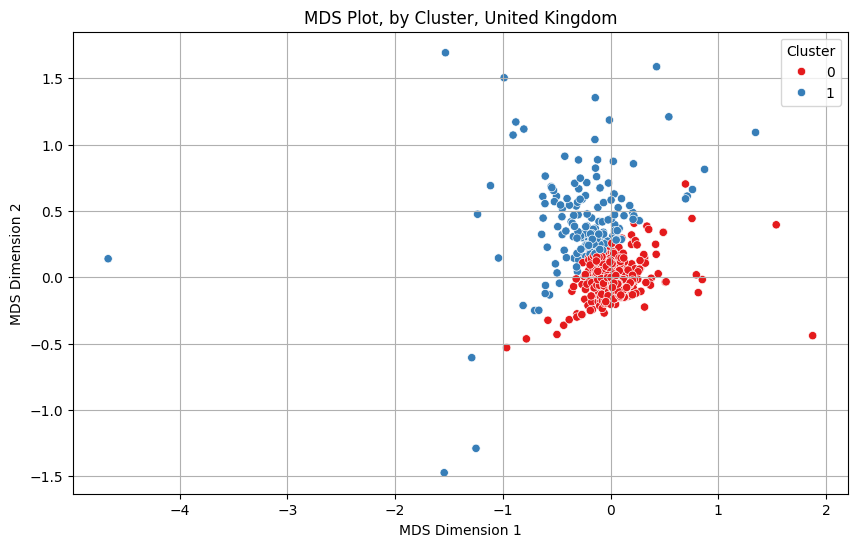

NameError: name 'airline_factors_full' is not defined

In [133]:
from sklearn.metrics.pairwise import euclidean_distances
mds_df["Cluster"] = kmeans.labels_
mds_df["Gender"] = new_metadata["gender"]
mds_df["Name"] = new_metadata["name"]
mds_df["party_orientation_new"] = argument_metadata["party_orientation_new"]
mds_df["legislative_branch"] = argument_metadata["legislative_branch"]
mds_df["roles"] = argument_metadata["roles"]
mds_df["speech_length"] = new_metadata["speech_length"]



# Calculate the centroids of each cluster
centroids = kmeans.cluster_centers_

# Initialize lists to store cluster-specific distances and maximum distances
cluster_distances = []
max_distances = []

# # Calculate distances and maximum distances for each cluster
# for i, centroid in enumerate(centroids):
#     # Filter points belonging to the current cluster
#     cluster_points = mds_df[mds_df['Cluster'] == i][['MDS1', 'MDS2']]
# 
#     # Check if cluster_points is empty
#     if not cluster_points.empty:
#         # Calculate distances from the centroid to each point in the cluster
#         distances = euclidean_distances(cluster_points, [centroid])
# 
#         # Append distances to cluster_distances
#         cluster_distances.append(distances)
# 
#         # Calculate maximum distance within the cluster
#         max_distance = distances.max()
#         max_distances.append(max_distance)

# Plot the scatter plot with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MDS1', y='MDS2', data=mds_df, hue='Cluster', palette='Set1')

# # Annotate each point with country name
# for index, row in mds_df.iterrows():
#     plt.text(row['MDS1'], row['MDS2'] + 10, row['Name'], fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.8))

# # Draw circles around each cluster
# for i, centroid in enumerate(centroids):
#     if max_distances[i] > 0:  # Check if max_distance is greater than 0 to ensure cluster has points
#         circle = plt.Circle((centroid[0], centroid[1]), max_distances[i], color='gray', fill=False)
#         plt.gca().add_patch(circle)

plt.title('MDS Plot, by Cluster, United Kingdom')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()# Pair plot
sns.pairplot(pd.DataFrame(airline_factors_full), hue="satisfaction")
plt.show()

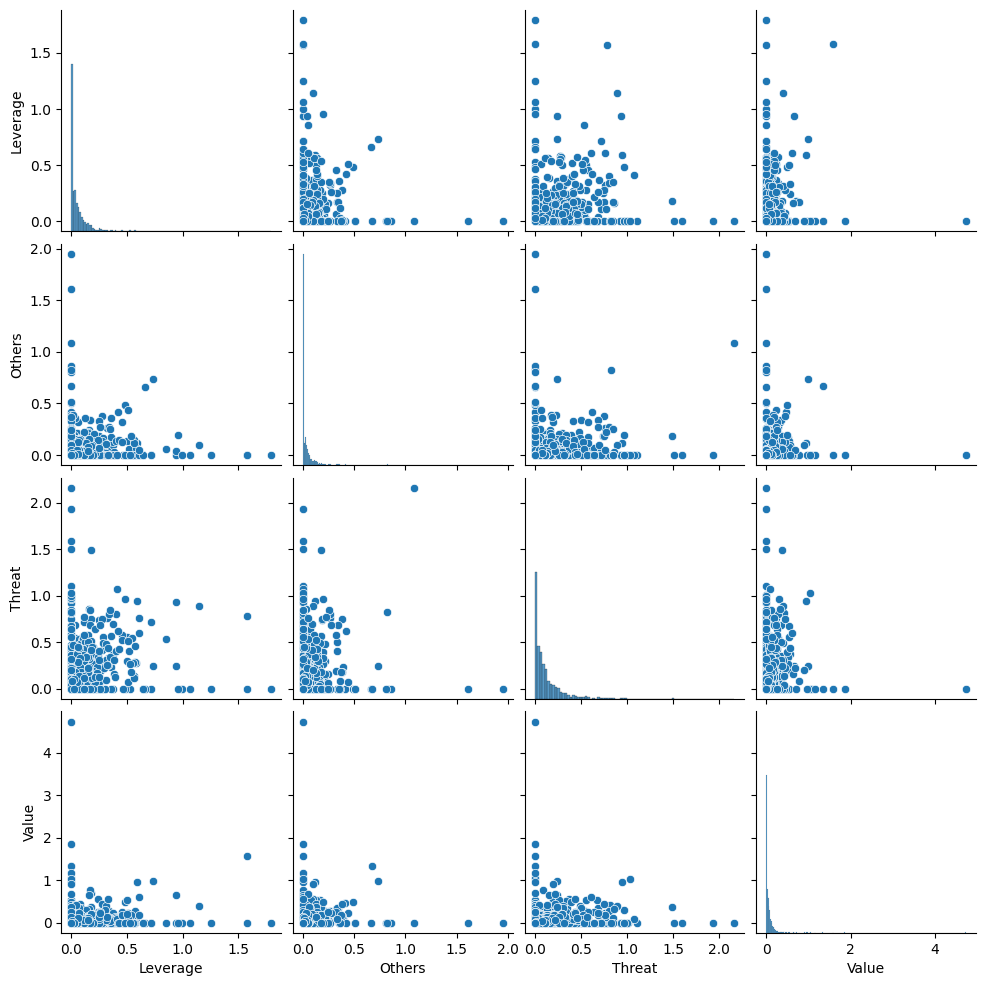

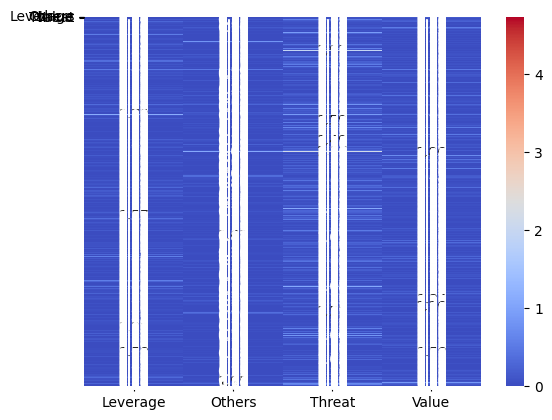

In [129]:
# Pair plot
sns.pairplot(pd.DataFrame(values_merged_gb_data))
plt.show()

sns.heatmap(values_merged_gb_data, cmap='coolwarm', annot=True, fmt='.2f', yticklabels=values_merged_gb_data.columns)
plt.show()